In [25]:
#### Importing Libraries ####

import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [26]:
dataset = pd.read_csv('~/Desktop/COVID/Udemy/Udemy Machine learning case studies/Fintech app subscribers/appdata10.csv')

EDA 

In [27]:
dataset.head(10)# Viewing the Data


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [28]:
dataset.describe() # Distribution of Numerical Variables

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# First set of Feature cleaning. Hour column doesnt show up. We need to convert it from a string,
# then slice it, and use the first and 2nd numbers, and convert it to type int
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

In [30]:
### Plotting. Remove columns we dont want and make  new temporary dataset. We don't need
# any of the dates, the user ID, how many screens, and the response variable - enrolled
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


/Users/rajvirbassi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


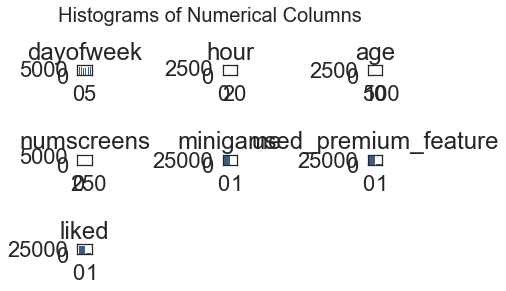

In [31]:
## Histograms
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

# we want to plot every image in a single picture, so iterate over every feature
for i in range(1, dataset2.shape[1] + 1):

# dimenions of the plot is 3X3    
    plt.subplot(3, 3, i)
    f = plt.gca()

# Set the title for each plot using the column headings
    f.set_title(dataset2.columns.values[i - 1])
    
#create a vals variable which uses all the unique values in each column    
    vals = np.size(dataset2.iloc[:, i - 1].unique())

    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    #plt.savefig('app_data_hist.jpg')
    
#we  see that when we convert the time to PST, there is a dip in early morning/
# late night hours of app usage, so less subscriptions then.

# there is also a good correlation between age and subscriptions


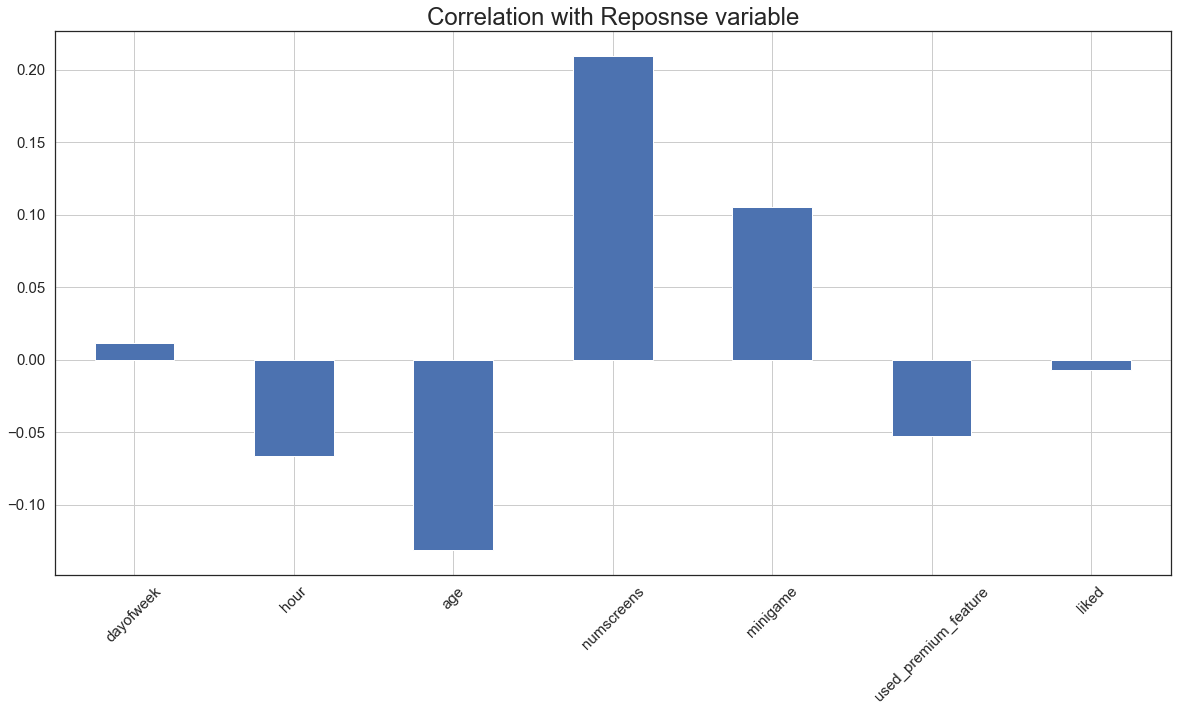

In [32]:
# now we check the correlation with Response Variable
# corrwith is a pandas fucntion. Argument is dataset.response variable

dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)

# dayofweek: slightly positive--> the later the day, the more likely to enroll
# hour: -ve 
# Age: -ve --> the older the person, the less likely to enroll
# used_premium_feature: -ve --> more people use the premium features, the LESS
                        # likely to enroll


TypeError: 'float' object cannot be interpreted as an integer

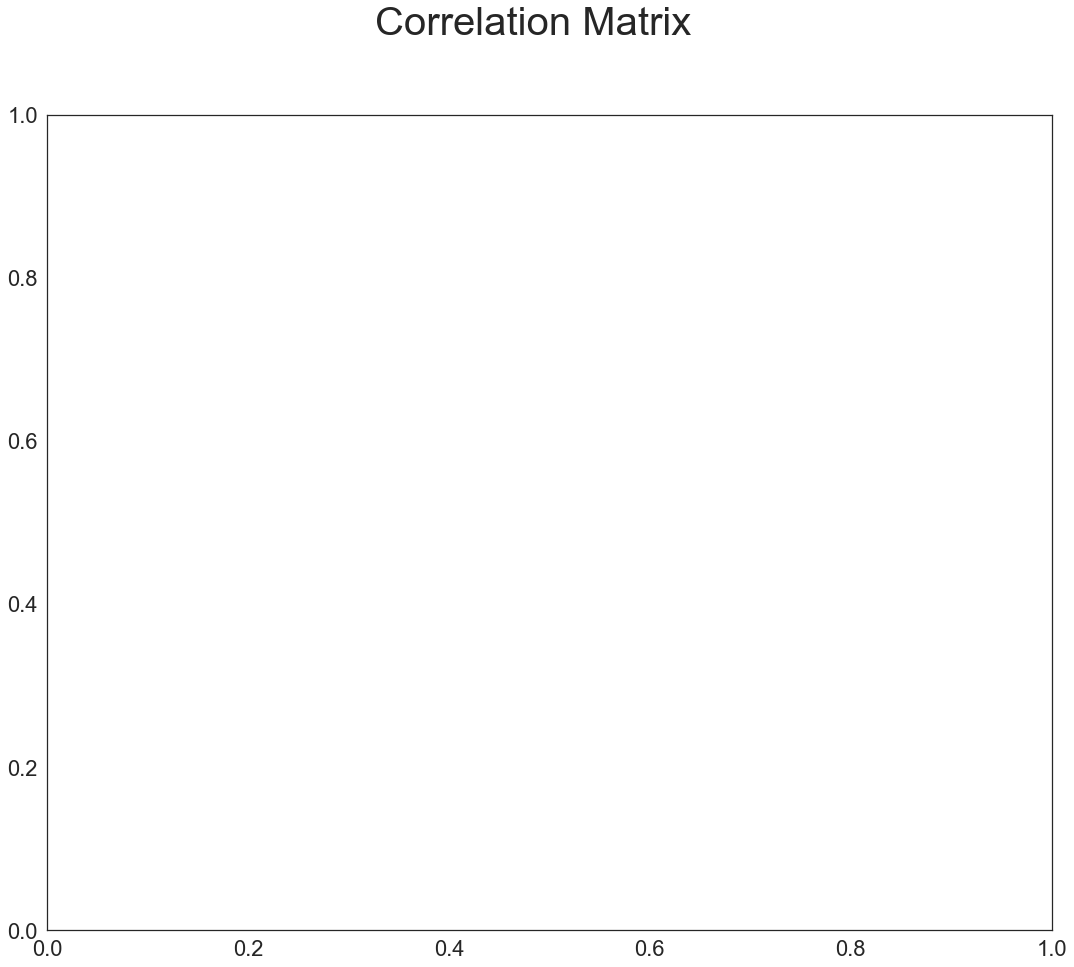

In [38]:
# To build a machine learning model, we want the features to be independent of each others.
# We do not want any field to be dependent on each other

## Correlation Matrix
sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# error is due to bug with seaborn and numpy versions 

# even though there are related fields, they have very tiny values for the correlation,
# so there is not indication that there is linear dependence. 



In [39]:
#### Feature Engineering ####

# We need to finetune the response variable so we have a set a time limit of when we expect a user to convert to a 
# paid member.

#To understand what time limit is optimal, we plot the distribution of our differences between
# our first open and our enrollment date


dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [40]:
# Formatting Date Columns to date/time obejects

#convert everything in "first_open" into a date/time object
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]

# convert everything in "enrolled_date" into a date/time object. However,
# some cells have no entries, so we run an if loop to tell it to only do so for
# entries
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

# Selecting Time For Response, difference between the above two
# timedelta64[h] makes the time differnece to be converted to hours
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')


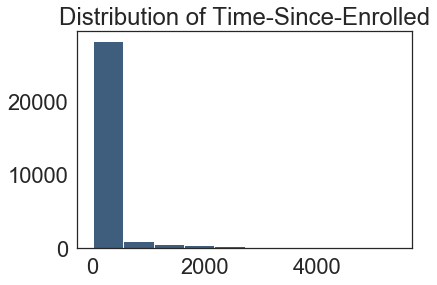

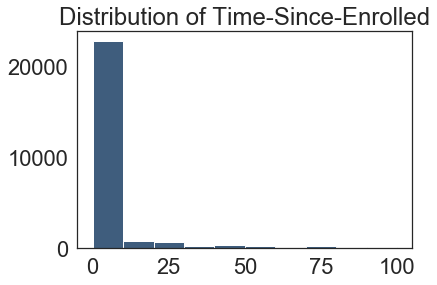

In [42]:
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

# We see majority of enrolment occur in the 1st 500 hours. but because this we can be more specific
# and find out how the distribution is within the first 100 hours

plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()


In [43]:
# We see that most happens within the first 10 hours. So we can include the most people by setting
# our goal time to 48 hours (2 days) for ur response variable. Remove anyone who took 
# longer than 48 hours to enroll from the dataset. 

dataset.loc[dataset.difference > 48, 'enrolled'] = 0

# we have also used the following columns already and have no use for them anymore, 
# so drop them.
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [44]:
## Formatting the screen_list Field
 # We cant use this field as is for analysis. We can use the top screens tht people
    #use (from a data analyst)
top_screens = pd.read_csv('~/Desktop/COVID/Udemy/Udemy Machine learning case studies/Fintech app subscribers/top_screens.csv').top_screens.values

top_screens 


array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [45]:
# Mapping Screens to Fields

dataset["screen_list"] = dataset.screen_list.astype(str) + ','

#create a column for each top screen, with the name of that column being that of the screen name
# the rows will contain Bool (T,F), which we can then convert to integer for analysis
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    #remove the screen from the main list of screens that we have
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

    # Now we are left with the list of those that are not in the top screens
    # count them using commas
dataset['Other'] = dataset.screen_list.str.count(",")
#now we have no need for this column
dataset = dataset.drop(columns=['screen_list'])


In [46]:
# Funnels

# These are a group of screens that belong to the same set. If they belong
# to the one funnel they are correlated, so by grouping them, we remove the correlated data from the 
# output variable.
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

#call the new column the "SavingCount", which is the count of the saving screens.so if 
# 3 of the saveing screens are populates, teh "SavingCount" is valued at 3
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)

#get rid of the columns once theyve been counted and aggregated
dataset = dataset.drop(columns=savings_screens)

#We do this for the following fields too
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)


In [47]:
#### Saving Results ####
dataset.head()
dataset.describe()
dataset.columns

dataset.to_csv('new_appdata10.csv', index = False)